In [535]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import warnings
warnings.filterwarnings('ignore')
import sklearn

In [536]:
data = pd.read_csv('Labs-2PBS.csv', delimiter=';')
data.head()

,Sexe,Age,Statut,Occupation,Qualification,Etudie,NombreFS,NombreE,Jardinage,Cuisine,Sport,MinutesTV,LectureBD,MinutesL,EcouteRP,JournalIntime,Taille
0,F,60,Marie,Autre inactif,Cadre,Non,3,1,Non,Non,Oui,120,Non,0,Non,Non,Comme il faut
1,H,50,Marie,Exerce profession,Non concerne,Non,3,3,Oui,Non,Oui,"257,14",Non,0,Non,Non,Comme il faut
2,F,33,Marie,Exerce profession,Cadre,Non,0,1,Non,Non,Non,"51,43",Non,60,Non,Oui,Pas assez
3,H,82,Marie,Retraite,Non concerne,Non,1,2,Non,Non,Oui,60,Non,0,Non,Oui,Comme il faut
4,H,58,Marie,Exerce profession,Employe de bureau,Non,0,3,Non,Non,Non,180,Non,0,Non,Non,Comme il faut


In [537]:
data['MinutesTV'] = pd.to_numeric(data['MinutesTV'].str.replace(',', '.'), errors='coerce')
data['MinutesL'] = pd.to_numeric(data['MinutesL'].str.replace(',', '.'), errors='coerce')
data.head()

,Sexe,Age,Statut,Occupation,Qualification,Etudie,NombreFS,NombreE,Jardinage,Cuisine,Sport,MinutesTV,LectureBD,MinutesL,EcouteRP,JournalIntime,Taille
0,F,60,Marie,Autre inactif,Cadre,Non,3,1,Non,Non,Oui,120.00,Non,0.0,Non,Non,Comme il faut
1,H,50,Marie,Exerce profession,Non concerne,Non,3,3,Oui,Non,Oui,257.14,Non,0.0,Non,Non,Comme il faut
2,F,33,Marie,Exerce profession,Cadre,Non,0,1,Non,Non,Non,51.43,Non,60.0,Non,Oui,Pas assez
3,H,82,Marie,Retraite,Non concerne,Non,1,2,Non,Non,Oui,60.00,Non,0.0,Non,Oui,Comme il faut
4,H,58,Marie,Exerce profession,Employe de bureau,Non,0,3,Non,Non,Non,180.00,Non,0.0,Non,Non,Comme il faut


In [538]:
X = data.drop(columns=['NombreE'])
y = data['NombreE']

<Axes: ylabel='count'>

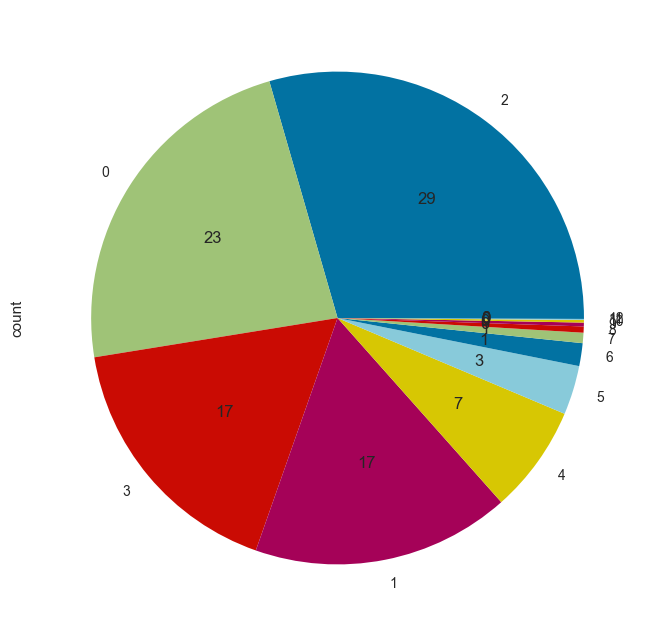

In [539]:
y.value_counts().plot(kind="pie", autopct="%1.0f", figsize=(8,8))

In [540]:
y=y.apply(lambda x:0 if x==0 else (1 if x in [1,2,3] else 2)) 
y

0       1
1       1
2       1
3       1
4       1
       ..
8398    1
8399    2
8400    1
8401    1
8402    1
Name: NombreE, Length: 8403, dtype: int64

<Axes: ylabel='count'>

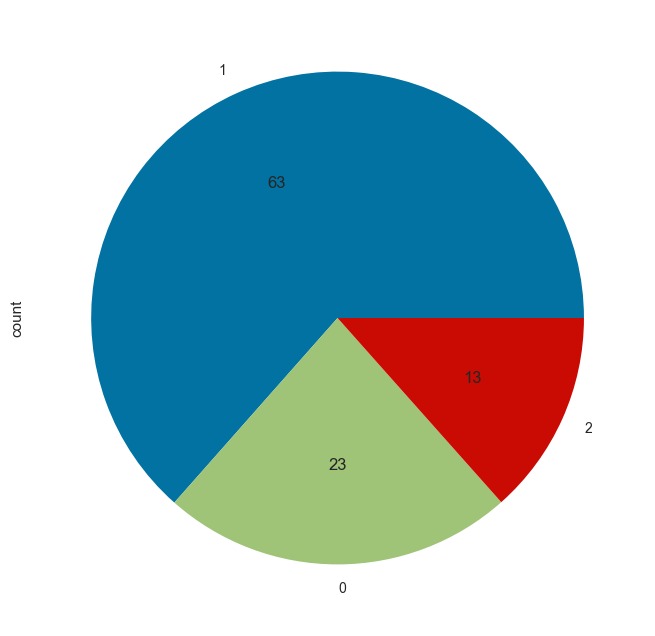

In [541]:
y.value_counts().plot(kind="pie", autopct="%1.0f", figsize=(8,8))

In [542]:
columns_to_exclude = X.select_dtypes(include='object').columns
columns_to_normalize = X.drop(columns=columns_to_exclude)

num=[c for c in X.columns if c in columns_to_normalize.columns]
X_normalized=X
X_normalized[num]=(X[num]-X[num].mean())/X[num].std()
X_normalized.head()

,Sexe,Age,Statut,Occupation,Qualification,Etudie,NombreFS,Jardinage,Cuisine,Sport,MinutesTV,LectureBD,MinutesL,EcouteRP,JournalIntime,Taille
0,F,0.696681,Marie,Autre inactif,Cadre,Non,-0.106552,Non,Non,Oui,-0.168406,Non,-0.287531,Non,Non,Comme il faut
1,H,0.106199,Marie,Exerce profession,Non concerne,Non,-0.106552,Oui,Non,Oui,1.026407,Non,-0.287531,Non,Non,Comme il faut
2,F,-0.897619,Marie,Exerce profession,Cadre,Non,-1.207405,Non,Non,Non,-0.765813,Non,0.913358,Non,Oui,Pas assez
3,H,1.995739,Marie,Retraite,Non concerne,Non,-0.840454,Non,Non,Oui,-0.691148,Non,-0.287531,Non,Oui,Comme il faut
4,H,0.578584,Marie,Exerce profession,Employe de bureau,Non,-1.207405,Non,Non,Non,0.354335,Non,-0.287531,Non,Non,Comme il faut


In [543]:
X_encoded = pd.get_dummies(X_normalized, columns=X_normalized.select_dtypes(include='object').columns, dtype=int)
X_encoded.head()

,Age,NombreFS,MinutesTV,MinutesL,Sexe_F,Sexe_H,Statut_Celibataire,Statut_Divorce,Statut_Marie,Statut_Veuf,...,LectureBD_Non,LectureBD_Oui,EcouteRP_Non,EcouteRP_Oui,JournalIntime_Non,JournalIntime_Oui,Taille_Comme il faut,Taille_Pas assez,Taille_Refus,Taille_Trop
0,0.696681,-0.106552,-0.168406,-0.287531,1,0,0,0,1,0,...,1,0,1,0,1,0,1,0,0,0
1,0.106199,-0.106552,1.026407,-0.287531,0,1,0,0,1,0,...,1,0,1,0,1,0,1,0,0,0
2,-0.897619,-1.207405,-0.765813,0.913358,1,0,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
3,1.995739,-0.840454,-0.691148,-0.287531,0,1,0,0,1,0,...,1,0,1,0,0,1,1,0,0,0
4,0.578584,-1.207405,0.354335,-0.287531,0,1,0,0,1,0,...,1,0,1,0,1,0,1,0,0,0


In [544]:
X_encoded.shape

(8403, 43)

In [545]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test=train_test_split(X_encoded,y,test_size=0.20,random_state=42) 

In [546]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

print('Precision train: {:.4f}'.format(model.score(X_train, y_train)))
print('Precision test : {:.4f}'.format(model.score(X_test, y_test)))
print('\n')

Precision train: 0.7542
Precision test : 0.7543




In [547]:
y_pred = model.predict(X_test)

In [548]:
resultat=pd.DataFrame()
resultat['reel']=y_test
resultat['predict']=y_pred.round(0)
resultat['erreur']=(y_pred-y_test)
resultat['erreur_relative']=(y_pred-y_test)/y_test*100
resultat

,reel,predict,erreur,erreur_relative
518,1,1,0,0.0
6680,1,1,0,0.0
233,0,0,0,NaN
5885,0,1,1,inf
5879,1,1,0,0.0
...,...,...,...,...
7202,1,1,0,0.0
7131,2,2,0,0.0
1515,1,1,0,0.0
216,1,1,0,0.0


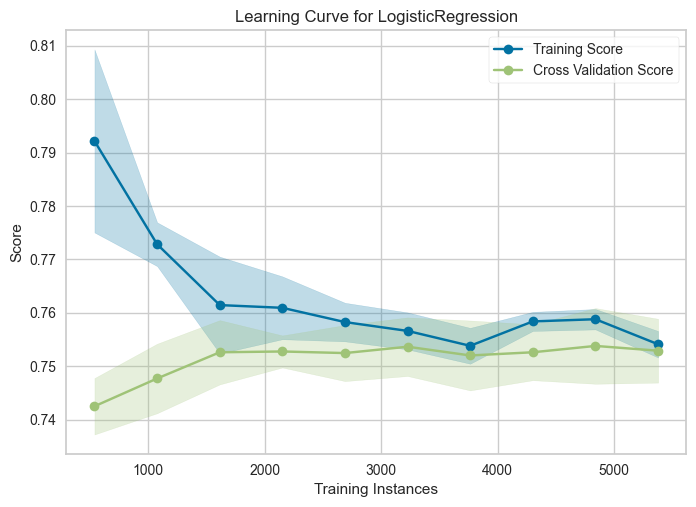

<Axes: title={'center': 'Learning Curve for LogisticRegression'}, xlabel='Training Instances', ylabel='Score'>

In [549]:
from yellowbrick.model_selection import LearningCurve

sizes = np.linspace(0.1, 1.0, 10)

visualizer = LearningCurve(model, train_sizes=sizes)

visualizer.fit(X_train, y_train)
visualizer.show()

In [550]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier(max_depth=10, n_estimators=30)
model2.fit(X_train, y_train)


print("precision train",model2.score(X_train,y_train))
print("precision test",model2.score(X_test,y_test))

precision train 0.8006545670931271
precision test 0.7572873289708507


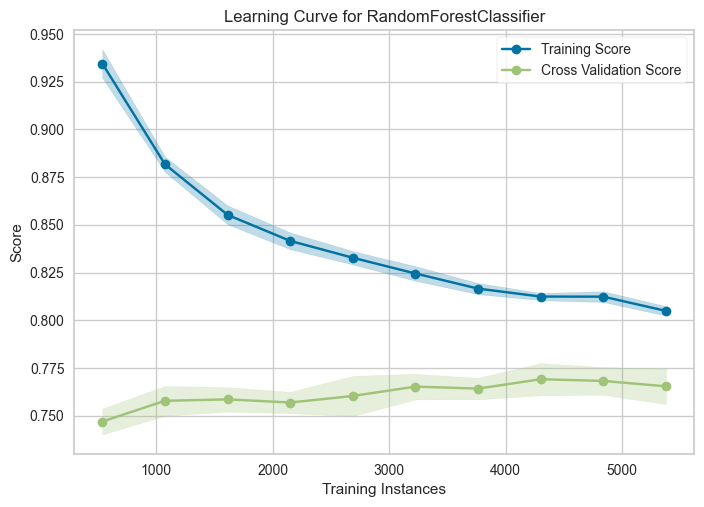

<Axes: title={'center': 'Learning Curve for RandomForestClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [551]:
sizes = np.linspace(0.1, 1.0, 10)

visualizer = LearningCurve(model2, train_sizes=sizes)

visualizer.fit(X_train, y_train)
visualizer.show()

In [552]:
#permet de visualiser les metriques: precison, rappel, fi-score, seuil
from sklearn.metrics import classification_report
print(classification_report(y_test, model2.predict(X_test), target_names=["0","1","2"]))   


              precision    recall  f1-score   support

           0       0.79      0.71      0.75       404
           1       0.75      0.93      0.83      1055
           2       0.40      0.01      0.02       222

    accuracy                           0.76      1681
   macro avg       0.65      0.55      0.53      1681
weighted avg       0.71      0.76      0.70      1681



On peut encore améliorer en gérant les valeurs aberrantes probablement.